In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler


In [21]:
df=pd.read_csv("BTC-Hourly.csv")
df.dropna(inplace=True)
df.rename(columns={"date": "Date","open": "Open", "high": "High", "low": "Low", "close": "Close"}, inplace=True)


In [22]:
df.head()

,unix,Date,symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


In [23]:
df.tail()

,unix,Date,symbol,Open,High,Low,Close,Volume BTC,Volume USD
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
33258,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        33259 non-null  int64  
 1   Date        33259 non-null  object 
 2   symbol      33259 non-null  object 
 3   Open        33259 non-null  float64
 4   High        33259 non-null  float64
 5   Low         33259 non-null  float64
 6   Close       33259 non-null  float64
 7   Volume BTC  33259 non-null  float64
 8   Volume USD  33259 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


In [49]:
df.describe()

,unix,Open,High,Low,Close,Volume BTC,Volume USD
count,3.325900e+04,33259.000000,33259.000000,33259.000000,33259.000000,3.325900e+04,3.325900e+04
mean,1.586228e+09,20119.546772,20232.957473,19997.069777,20120.684800,1.612380e+06,2.965701e+06
std,3.456429e+07,18537.219607,18646.950933,18418.320297,18537.695044,3.102328e+06,7.329787e+06
min,1.526364e+09,3139.760000,3158.340000,3122.280000,3139.760000,0.000000e+00,0.000000e+00
25%,1.556296e+09,7022.865000,7055.835000,6970.570000,7022.865000,1.903241e+02,1.682800e+02
50%,1.586228e+09,9700.040000,9740.270000,9657.000000,9700.320000,6.093271e+05,5.248300e+02
75%,1.616161e+09,36415.305000,36735.380000,36104.235000,36423.040000,1.929240e+06,3.120014e+06
max,1.646093e+09,68635.050000,69000.000000,68447.000000,68627.010000,6.857061e+07,2.582324e+08


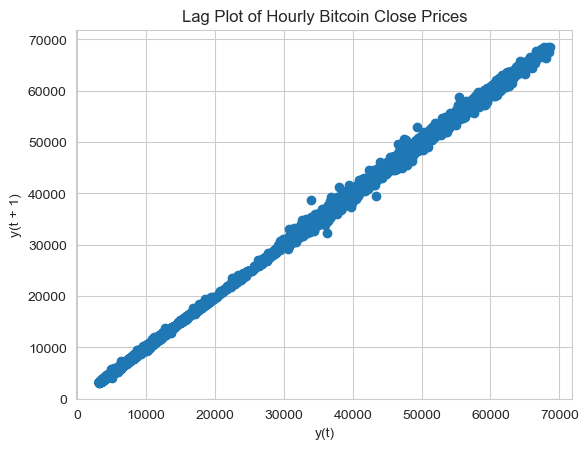

In [50]:
# Import necessary libraries
from pandas.plotting import lag_plot

# Assuming 'dataset' contains your hourly DataFrame with 'Close' prices
lag_plot(dataset['Close'], lag=1)  # 'lag' parameter indicates the lag value
plt.title('Lag Plot of Hourly Bitcoin Close Prices')
plt.show()

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

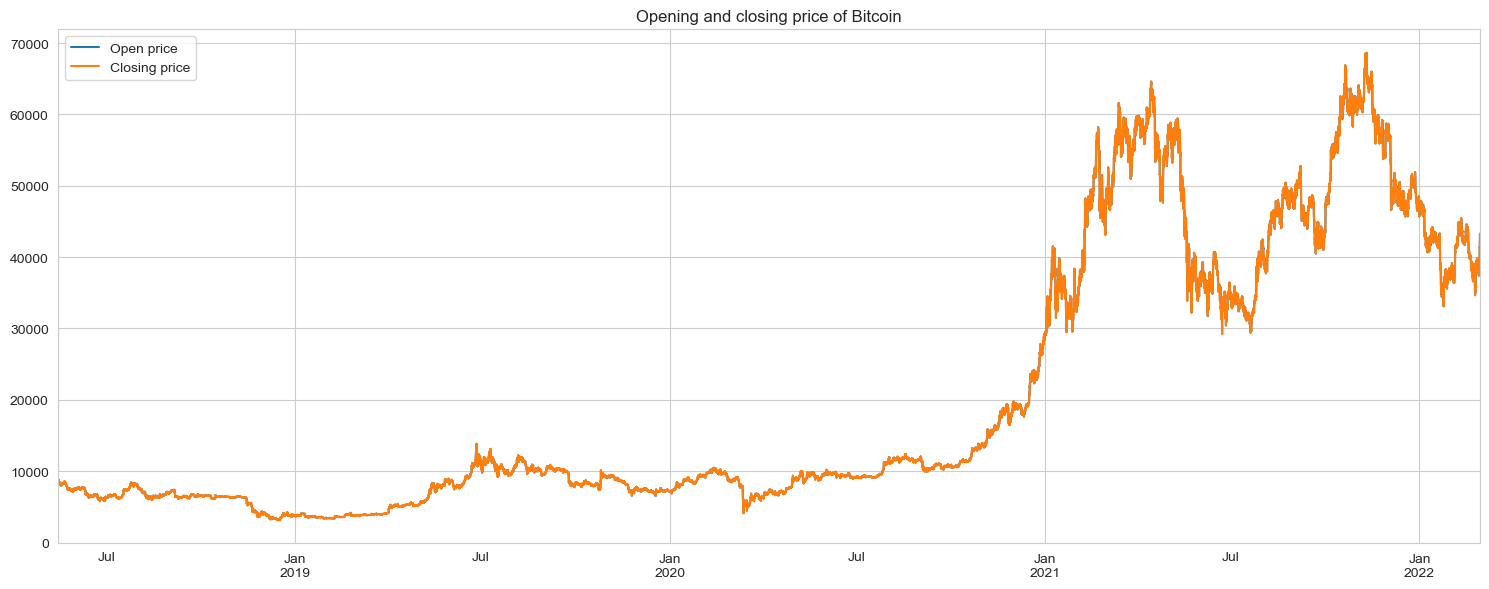

In [27]:
plt.figure(figsize=(15,6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and closing price of Bitcoin')
plt.legend(['Open price','Closing price'])
plt.tight_layout()
plt.show()

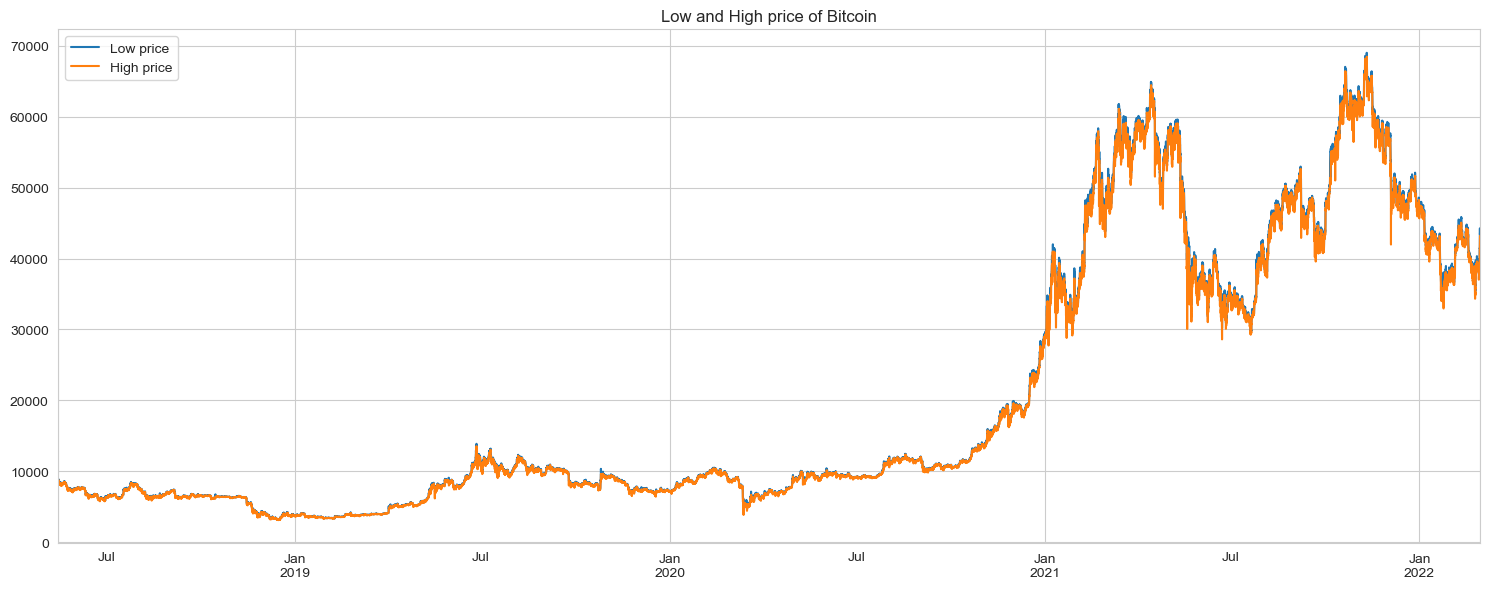

In [28]:
plt.figure(figsize=(15,6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Low and High price of Bitcoin')
plt.legend(['Low price','High price'])
plt.tight_layout()
plt.show()

In [29]:
n_cols=1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(33259, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [31]:
train_size=int(len(data)*0.75)
test_size=len(data) - train_size
print('Train Size: ',train_size, 'Test Size:', test_size)

Train Size:  24944 Test Size: 8315


In [32]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(24944, 1)

In [33]:
x_train = []
y_train = []
time_steps = 60
n_cols =1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i<=time_steps:
        print('X_train:', x_train)
        print('Y_train:', y_train)

X_train: [array([[0.61344017],
       [0.61140482],
       [0.60725653],
       [0.58820259],
       [0.5921032 ],
       [0.5836672 ],
       [0.5817027 ],
       [0.58474207],
       [0.57825928],
       [0.57578567],
       [0.56041962],
       [0.53317921],
       [0.53646122],
       [0.53793326],
       [0.53849322],
       [0.5342443 ],
       [0.53740858],
       [0.53809513],
       [0.53220925],
       [0.52999569],
       [0.52979198],
       [0.5294875 ],
       [0.52879973],
       [0.53220696],
       [0.52577257],
       [0.52793361],
       [0.52976724],
       [0.52331179],
       [0.53201303],
       [0.52689524],
       [0.54642499],
       [0.54762843],
       [0.54949322],
       [0.55336176],
       [0.54422273],
       [0.54910353],
       [0.55919526],
       [0.55554402],
       [0.55384659],
       [0.54945428],
       [0.54546877],
       [0.54510779],
       [0.54476345],
       [0.54179035],
       [0.54137821],
       [0.54205559],
       [0.54106547],
   

In [34]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [36]:
x_train.shape, y_train.shape

((24884, 60, 1), (24884, 1))

In [37]:
model=Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam', loss='mse', metrics= 'mean_absolute_error')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
778/778 [==============================] - 28s 32ms/step - loss: 5.5655e-04 - mean_absolute_error: 0.0080
Epoch 2/100
778/778 [==============================] - 27s 35ms/step - loss: 8.5145e-05 - mean_absolute_error: 0.0059
Epoch 3/100
778/778 [==============================] - 27s 34ms/step - loss: 7.2877e-05 - mean_absolute_error: 0.0055
Epoch 4/100
778/778 [==============================] - 27s 35ms/step - loss: 7.1499e-05 - mean_absolute_error: 0.0056
Epoch 5/100
778/778 [==============================] - 28s 35ms/step - loss: 5.9489e-05 - mean_absolute_error: 0.0051
Epoch 6/100
778/778 [==============================] - 27s 35ms/step - loss: 5.5983e-05 - mean_absolute_error: 0.0050
Epoch 7/100
778/778 [==============================] - 28s 36ms/step - loss: 4.6528e-05 - mean_absolute_error: 0.0045
Epoch 8/100
778/778 [==============================] - 27s 35ms/step - loss: 3.8100e-05 - mean_absolute_error: 0.0041
Epoch 9/100
778/778 [==============================] - 2

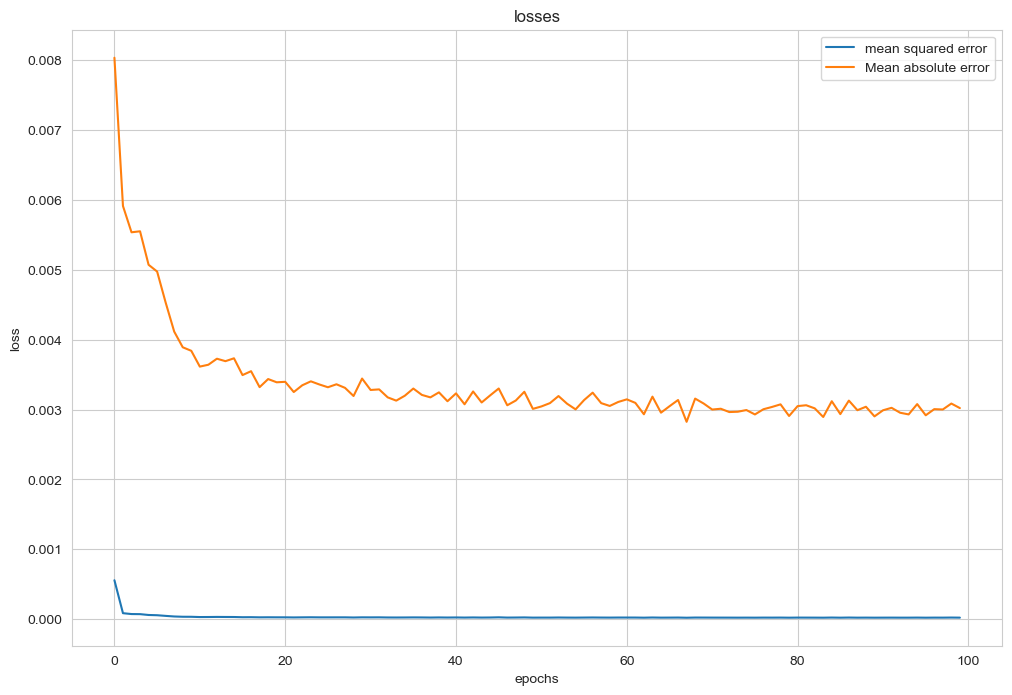

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['mean squared error','Mean absolute error'])
plt.title("losses")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [41]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i - time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))


In [42]:
x_test.shape, y_test.shape

((8315, 60, 1), (8315, 1))

In [43]:
predictions = model.predict(x_test)

260/260 [==============================] - 3s 8ms/step


In [44]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(8315, 1)

In [45]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean((y_test - predictions)**2)).round(2)
rmse

56.81

In [46]:
preds_acts = pd.DataFrame(data={'predictions': predictions.flatten(), 'Actuals': y_test.flatten()})
preds_acts

,predictions,Actuals
0,5139.364746,5103.84
1,5143.330078,5137.57
2,5172.093262,5166.00
3,5195.593262,5166.05
4,5198.215332,5175.00
...,...,...
8310,8742.494141,8795.90
8311,8767.480469,8708.32
8312,8694.994141,8728.49
8313,8715.072266,8739.00


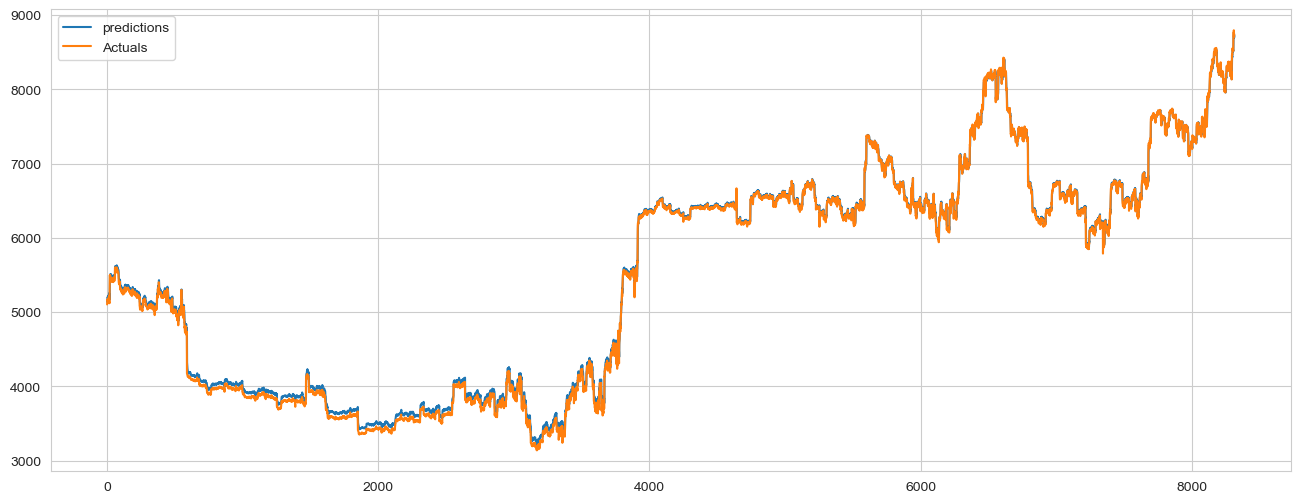

In [47]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['predictions', 'Actuals'])
plt.show()

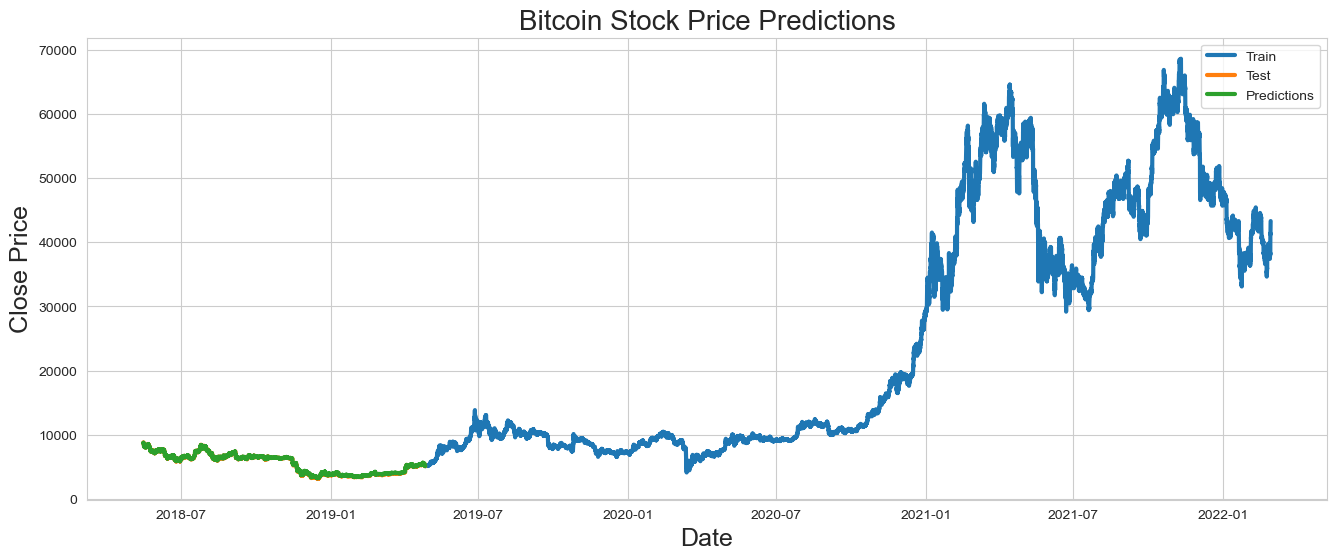

In [48]:

train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Bitcoin Stock Price Predictions', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

plt.plot(train['Close'], linewidth=3)
plt.plot(test['Close'], linewidth=3)
plt.plot(test['predictions'], linewidth=3)

plt.legend(['Train', 'Test', 'Predictions'])
plt.show()
